## Exercise 1: read an image, create a cutout, and examine histogram   
Download the file `ibkf10020_drz.fits` from the Canvas site. This is a Hubble Space Telescope Wide Field Camera 3 (WFC3) image of the remnant of supernova 1987a in the “wide Hα + [NIII]” filter (F657N).  
1. Read in the file and store the first image as a `CCDData` object. The image header has `BUNIT = 'ELECTRONS/S'`, but this doesn't correspond to a valid AstroPy unit, so set the unit to `1/s`.



In [8]:
#Code Here

from astropy.nddata import CCDData
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
import matplotlib.pyplot as plt
import numpy as np

IMG = CCDData.read('ibkf10020_drz.fits', unit = '1/s')
IMG

INFO: first HDU with data is extension 1. [astropy.nddata.ccddata]
INFO: using the unit 1/s passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [astropy.nddata.ccddata]


CCDData([[       nan, 0.02444074, 0.01350344, ...,        nan,
                 nan,        nan],
         [       nan, 0.03200131, 0.01809567, ...,        nan,
                 nan,        nan],
         [0.01375689, 0.01876842, 0.01794416, ...,        nan,
                 nan,        nan],
         ...,
         [       nan,        nan,        nan, ..., 0.00717486,
          0.01580324, 0.00179659],
         [       nan,        nan,        nan, ..., 0.00030195,
          0.00030195, 0.00179659],
         [       nan,        nan,        nan, ..., 0.00127405,
          0.00127405,        nan]], dtype='>f4', unit='1 / s')

2. Cut out a 2 by 2.5 arcsec region around the coordinates RA = 5h35m28.09s, Dec = -69d16m10.85s.


In [7]:
#Code Here
coords = SkyCoord('5h35m28.09s', '-69d16m10.85s', frame='icrs')
area = [2 * u.arcsec, 2.5 * u.arcsec]
imgcut = Cutout2D(IMG.data, coords, area, wcs=IMG.wcs)
imgcut.data

array([[0.0366057 , 0.03599194, 0.03817118, ..., 0.2963603 , 0.4055661 ,
        1.3444189 ],
       [0.03719747, 0.04572077, 0.04851567, ..., 0.25975448, 0.31248996,
        0.7944653 ],
       [0.03661466, 0.03635344, 0.0359551 , ..., 0.3587904 , 0.36104843,
        0.4700828 ],
       ...,
       [0.05544493, 0.06222889, 0.07495615, ..., 0.04378406, 0.03368865,
        0.02720729],
       [0.04630425, 0.05392953, 0.07052323, ..., 0.04692434, 0.03457739,
        0.03156177],
       [0.04719587, 0.05750835, 0.06652066, ..., 0.04750169, 0.04533702,
        0.03999174]], dtype='>f4')

3. Now plot two histograms of the cutout data values. (You will need to flatten or ravel the 2D array into a 1D array to get what we want out of `plt.hist()`.) The first plot should be based on the raw data values (call them `x`), and the second should be based on

   $$
   Y = \frac{\log(1000X + 1)}{\log 1001}
   $$

Use 100 bins.

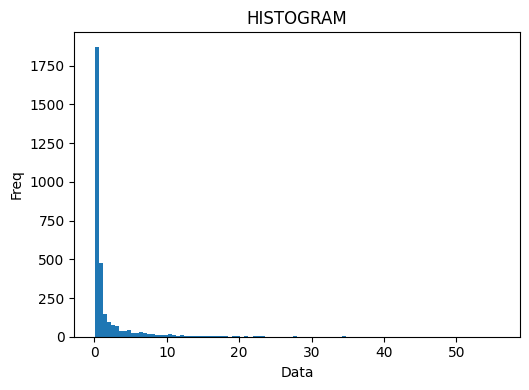

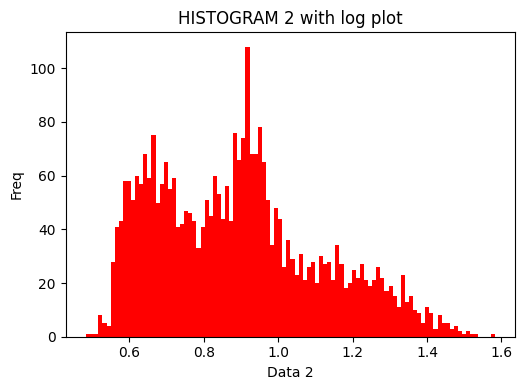

In [11]:
#Code Here
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(imgcut.data.ravel(), bins=100)
plt.title("HISTOGRAM")
plt.xlabel('Data')
plt.ylabel('Freq')

plt.tight_layout()
plt.show()
#############################################################################################
#The following is the first histogram
y = np.log(1000 * imgcut.data.ravel() + 1)/np.log(1001)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y, bins=100, color = 'red')
# DIFF COLORS FOR TWO
plt.title("HISTOGRAM 2 with log plot")
plt.xlabel('Data 2')
plt.ylabel('Freq')


plt.tight_layout()
plt.show()

## Exercise 2: plot the image and cutout
Now plot the image using the correct WCS, using a logarithmic stretch. Plot the outline of the cutout region on the main image and display the cutout in its own subplot. You should be able to produce a plot like the following (check pdf).


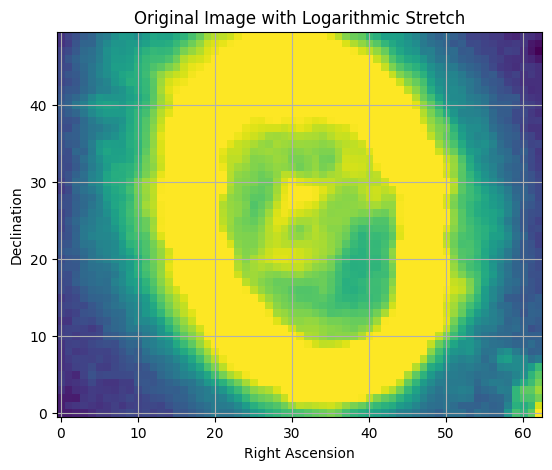

In [31]:
#Code Here
import astropy

stretch = astropy.visualization.LogStretch()
data_stretch =stretch(imgcut.data)

plt.figure(figsize=(10, 5))
# plt.subplot(121, projection=imgcut.wcs)
plt.imshow(data_stretch, origin='lower')
plt.xlabel('Right Ascension')
plt.ylabel('Declination')
plt.title('Original Image with Logarithmic Stretch')
plt.grid()


## Exercise 3: further analysis  
Now take the cutout data from the SN1987a image and perform the following analysis on the unstretched cutout data.  
1. Create a calibrated copy of the cutout region: convert the cutout data to `erg/cm^2/s/Angstrom/pixel` by multiplying by the image header's `PHOTFLAM` value, which is given in `erg/cm^2/Angstrom` (actually per electron).  
    


In [46]:
#Code Here
imgfile = astropy.io.fits.open("ibkf10020_drz.fits")
header = imgfile[0].header
PHOTFLAM = header['PHOTFLAM']

cali_data = imgcut.data * PHOTFLAM
# cali_data



2. Compute and print the sum of the pixels in the cutout region with values `> PHOTFLAM`. This is a (crude) estimate of the flux in the bright inner ring. You should get something like this:

   `total flux in ring = 9.978624e-15 erg/s/cm^2/Angstrom`

In [ ]:
#Code Here
ring = cali_data > PHOTFLAM
total_flux = np.sum(cali_data[ring])
total_flux
print(f"total flux in ring is {total_flux} erg/s/cm^2/Angstrom" )

total flux in ring is 9.97224763703286e-15 erg/s/cm^2/Angstrom


In [5]:
import numpy as np
import numpy.linalg as la
# Given vector v
v = np.array([1, 2])

# Calculate the 2-norm of v
norm_v = np.linalg.norm(v)

# Normalize the vector v
v_normalized = v / norm_v

# The normalized vector and its 2-norm
v_normalized, np.linalg.norm(v_normalized)


(array([0.4472136 , 0.89442719]), 0.9999999999999999)

In [6]:
A = [[3,-18],[2,-9]]

la.eig(A)

EigResult(eigenvalues=array([-3., -3.]), eigenvectors=array([[0.9486833 , 0.9486833 ],
       [0.31622777, 0.31622777]]))

In [15]:
x = [[1,0,0],[0,1,0],[0,0,1]]
la.matrix_rank(x)

3

In [32]:
A = np.array([[7.3,0],[4.6,9.6]])
v = np.array([[0],[1]])
B = A @v
B
# val,vec = la.eig(A)

array([[0. ],
       [9.6]])

In [28]:
7.3+9.6

16.9

In [33]:
vec
# val


array([[ 0.        ,  0.4472136 ],
       [ 1.        , -0.89442719]])

In [34]:
import numpy as np
A = np.array([])